# Direct and iterative numerical methods

### Install library

Note:- Before installing `Rlinesolve` we have to install `RcppArmadillo` by command line `conda install -c conda-forge r-rcpparmadillo`

https://anaconda.org/conda-forge/r-rcpparmadillo

In [1]:
install.packages('Rlinsolve')
install.packages('ggplot2')
install.packages('pracma')

also installing the dependencies ‘bigmemory.sri’, ‘bibtex’, ‘gbRd’, ‘bigmemory’, ‘Rdpack’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [103]:
library(RcppArmadillo)
library(Rlinsolve)
library(ggplot2)
library(pracma)

options(repr.plot.width = 6, repr.plot.height = 4)

### Implementation of the Jacobi iteration to find the solution to 𝐴𝑥=𝑏

__Jacobi iteration__:- In numerical linear algebra, the Jacobi method is an iterative algorithm for determining the solutions of a strictly diagonally dominant system of linear equations. Each diagonal element is solved for, and an approximate value is plugged in. The process is then iterated until it converges. This algorithm is a stripped-down version of the Jacobi transformation method of matrix diagonalization. The method is named after Carl Gustav Jacob Jacobi.


#### Diagonally dominant means: 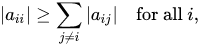

https://www.rdocumentation.org/packages/Rlinsolve/versions/0.3.0/topics/lsolve.jacobi

https://en.wikipedia.org/wiki/Jacobi_method

Example:- https://en.wikipedia.org/wiki/Jacobi_method#Example

### Equation are `2x + y = 11` and `5x + 7y = 13`

### Create a matrix for above equation

In [82]:
A <- matrix(c(2, 1,
              5, 7), nrow = 2, ncol = 2, byrow = T)

A

2,1
5,7


### Create a matrix as a vector for above equation

In [83]:
b <- matrix(c(11, 13), nrow = 2, ncol = 1, byrow = T)

b

11
13


### Apply jacobi method to solve linear equation

In [84]:
out1 = lsolve.jacobi(A, b, weight = 1, verbose = F)

### Value of `x` and `y` for the solution of equation

In [85]:
out1$x

7.111096
-3.222161


In [86]:
out1$iter

[1] 400

### Error in each iteration

https://en.wikipedia.org/wiki/Jacobi_method#An_example_using_Python_and_Numpy

__error = | A . x - b |__

In [87]:
head(out1$errors)

0.9825539
0.9441379
0.9276664
0.8913964
0.8758451
0.8416012


In [88]:
tail(out1$errors)

"[396,]",1.140298e-05
"[397,]",1.120404e-05
"[398,]",1.076598e-05
"[399,]",1.057816e-05
"[400,]",1.016457e-05
"[401,]",9.987242e-06


In [89]:
error <- out1$errors

iteration <- out1$iter

### Create sequence of iteration of 

In [92]:
iter_seq <- seq.int(0, iteration, 1)

iter_seq

[1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
[109] 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
[127] 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
[145] 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
[163] 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
[181] 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
[199] 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
[217] 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
[235] 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
[253] 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
[271] 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
[289] 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
[307] 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
[325] 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
[343] 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
[361] 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
[379] 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
[397] 396 397 398 399 400

### Fit it into data frame

In [93]:
error_per_iter <- data.frame(iter_seq, error)

head(error_per_iter)

iter_seq,error
0,0.9825539
1,0.9441379
2,0.9276664
3,0.8913964
4,0.8758451
5,0.8416012


### Error 

https://en.wikipedia.org/wiki/Jacobi_method#An_example_using_Python_and_Numpy

__error = | A . x - b |__

### Graph between error vs iteration

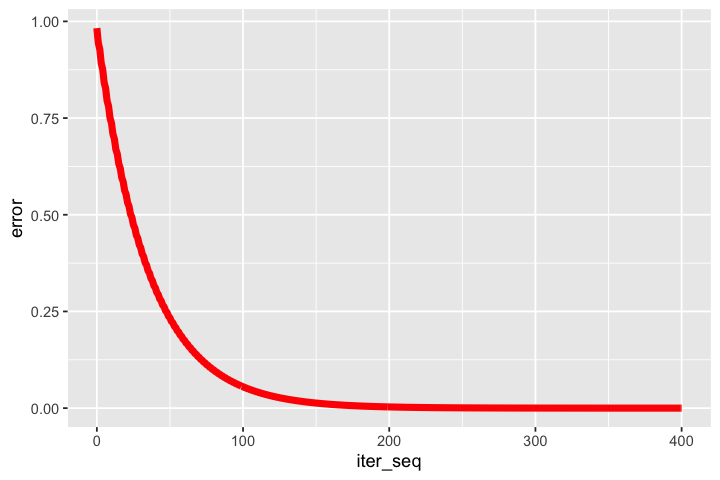

In [94]:
ggplot(error_per_iter, aes(x = iter_seq, y = error)) + 
                        geom_line(col = 'red', size = 2) 

### Apply jacobi method with weight = `0.66`

In [95]:
out2 = lsolve.jacobi(A, b, weight = 0.66, verbose = FALSE)

out2$x

7.109709
-3.221154


In [96]:
error <- out2$errors

iteration <- out2$iter

In [97]:
iter_seq <- seq(0, iteration, 1)

error_per_iter <- data.frame(iter_seq, error)

head(error_per_iter)

iter_seq,error
0,0.32288074
1,0.09253084
2,0.06332663
3,0.04758677
4,0.04893039
5,0.04710468


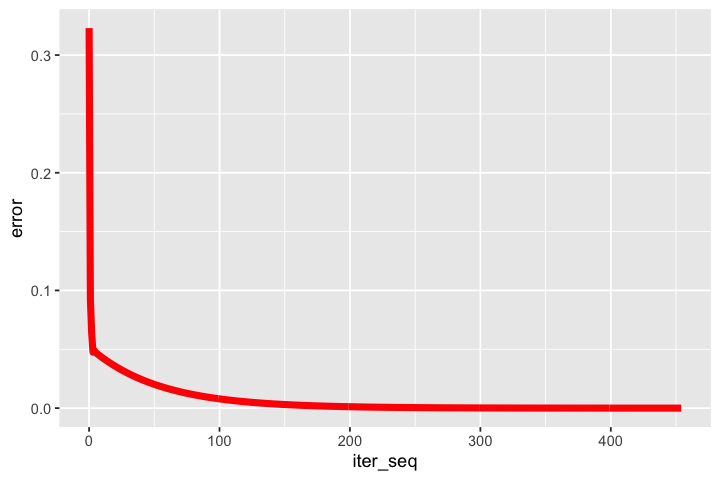

In [98]:
ggplot(error_per_iter, aes(x = iter_seq, y = error)) +
    geom_line(col = 'red', size = 2)

## Direct method

### Gaussian Elimination

https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/system/system.html#matrixnot

https://en.m.wikipedia.org/wiki/Gaussian_elimination

https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/gauss/gauss.html

### Example-I

### Equation are `2x + y = 11` and `5x + 7y = 13`

### Create a matrix for a above equation

In [104]:
A <- matrix(c(2, 1,
              5, 7), nrow = 2, ncol = 2, byrow = T)

A

2,1
5,7


### Create a matrix as a vector for above equation

In [105]:
b <- matrix(c(11, 13), nrow = 2, ncol = 1, byrow = T)

b

11
13


### Apply Reduced Row Echelon Form (`rref`)

https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/gauss/gauss.html

https://en.m.wikipedia.org/wiki/Gaussian_elimination

https://www.rdocumentation.org/packages/pracma/versions/1.9.9/topics/rref

http://mathworld.wolfram.com/EchelonForm.html

In [106]:
rref(cbind(A, b))

1,0,7.111111
0,1,-3.222222


In [108]:
A <- matrix(c(6, 4, 1,
              1, 4, 2,
              1, 1, 3), nrow = 3, ncol = 3, byrow = T)

A

6,4,1
1,4,2
1,1,3


In [109]:
b <- matrix(c(24,
              11,
              10), nrow = 3, ncol = 1, byrow = T)
b

24
11
10


### Apply Reduced Row Echelon Form (`rref`)

In [110]:
rref(cbind(A, b))

1,0,0,3
0,1,0,1
0,0,1,2


### Create a matrix for above equation

Note:- Here, matrix is not diagonally dominant.

`x + 2y = 5`, `5x + 4y = 3`

### Equation are `x + 2y = 5` and  `5x + 4y = 1`

In [115]:
A <- matrix(c(1, 2,
              5, 4), nrow = 2, ncol = 2, byrow = T)

A

1,2
5,4


### Create a matrix as a vector for above equation

In [116]:
b <- matrix(c(5, 3), nrow = 2, ncol = 1, byrow = T)

b

5
3


### Apply Reduced Row Echelon Form (`rref`)

In [117]:
rref(cbind(A, b))

1,0,-2.333333
0,1,3.666667


Solution of given equation are `x = -2.333333` and `y = -3.666667`

### Equation are `3x + 4y  + z = 15` ,  `x +2y + 2z = 9` and `x + y + z = 6`

### Create matrix for above equation

In [119]:
A <- matrix(c(3, 4, 1,
              1, 2, 2,
              1, 1, 1), nrow = 3, ncol = 3, byrow = T)

A

3,4,1
1,2,2
1,1,1


### Create a matrix as a vector for above equation

In [120]:
b <- matrix(c(15,
             9,
             6), nrow = 3, ncol = 1, byrow = T)
b

15
9
6


### Apply Reduced Row Echelon Form (`rref`)

In [121]:
rref(cbind(A, b))

1,0,0,3
0,1,0,1
0,0,1,2
